In [2]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

In [54]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

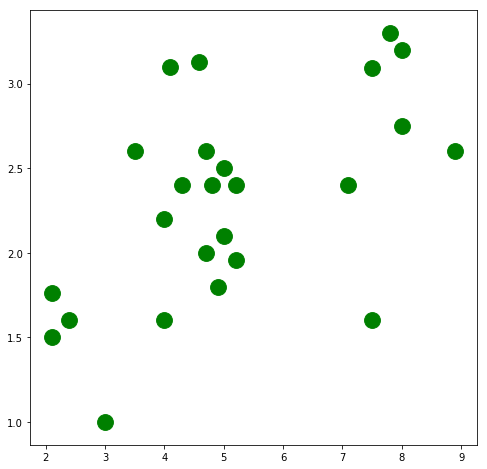

In [55]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.show()

In [56]:
x = torch.from_numpy(x_train) 
y = torch.from_numpy(y_train)

In [57]:
x.size()

torch.Size([25, 1])

- inp - input dimension
- hidden - hidden dimension
- out - output dimension

In [58]:
inp = 1
hidden = 5
out = 1

#### Creating model using nn.Sequential()

- Use the nn package to define our model as a sequence of layers. 
- nn.Sequential s a Module which contains other Modules, and applies them in sequence to produce its output https://pytorch.org/docs/0.3.1/nn.html#sequential.
- Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html.

In [59]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden, out))

the nn package also contains definitions of popular loss functions; in thiscase we will use <b>Mean Squared Error (MSE) </b> as our loss function.

In [60]:
loss_fn = torch.nn.MSELoss(reduction='sum')

- Forward pass:  
compute predicted y by passing x to the model. Module objects override the __call__ operator so you can call them like functions. When doing so you pass a Tensor of input data to the Module and it produces a Tensor of output data.


- loss:
We pass Tensors containing the predicted and true values of y, and the loss function returns a Tensor containing the loss.


- model.zero_grad():
Zero the gradients before running the backward pass


- Backward pass: 
compute gradient of the loss with respect to all the learnable parameters of the model. Internally, the parameters of each Module are stored in Tensors with requires_grad=True, so this call will compute gradients for
all learnable parameters in the model


- update the weights manually using gradient descent. Each parameter is a Tensor, so we can access its gradients like we did before.

In [61]:
learning_rate = 1e-4

for i in range(500):
    
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(i, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 120.91878509521484
1 94.27568817138672
2 73.82014465332031
3 58.08885192871094
4 46.04313659667969
5 36.89469528198242
6 30.018478393554688
7 24.908653259277344
8 21.154911041259766
9 18.427555084228516
10 16.46578598022461
11 15.0670804977417
12 14.077104568481445
13 13.38033676147461
14 12.89171314239502
15 12.549501419067383
16 12.30947208404541
17 12.140277862548828
18 12.019912719726562
19 11.933049201965332
20 11.8690767288208
21 11.82070255279541
22 11.782922744750977
23 11.752335548400879
24 11.726619720458984
25 11.704200744628906
26 11.68402099609375
27 11.665358543395996
28 11.64772891998291
29 11.630810737609863
30 11.614376068115234
31 11.598284721374512
32 11.582435607910156
33 11.566761016845703
34 11.551218032836914
35 11.535776138305664
36 11.520415306091309
37 11.505123138427734
38 11.489889144897461
39 11.474706649780273
40 11.459569931030273
41 11.444480895996094
42 11.429436683654785
43 11.414432525634766
44 11.399471282958984
45 11.384549140930176
46 11.36966800

In [62]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.0963],
        [1.4325],
        [2.9045],
        [2.7890],
        [1.9808],
        [2.9910],
        [3.3085],
        [2.2406],
        [2.0645],
        [1.3459],
        [3.0488],
        [2.1829],
        [2.9045],
        [2.1829],
        [1.8943],
        [3.0488],
        [2.2406],
        [2.1540],
        [1.6056],
        [2.0963],
        [1.8943],
        [2.1252],
        [1.7499],
        [1.3459],
        [1.9231]], grad_fn=<AddmmBackward>)

In [63]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.0962977],
       [1.4324569],
       [2.904452 ],
       [2.7890015],
       [1.9808472],
       [2.9910398],
       [3.3085291],
       [2.2406108],
       [2.0645487],
       [1.3458688],
       [3.0487652],
       [2.182886 ],
       [2.904452 ],
       [2.182886 ],
       [1.8942591],
       [3.0487652],
       [2.2406108],
       [2.154023 ],
       [1.6056327],
       [2.0962977],
       [1.8942591],
       [2.1251605],
       [1.749946 ],
       [1.3458688],
       [1.9231218]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

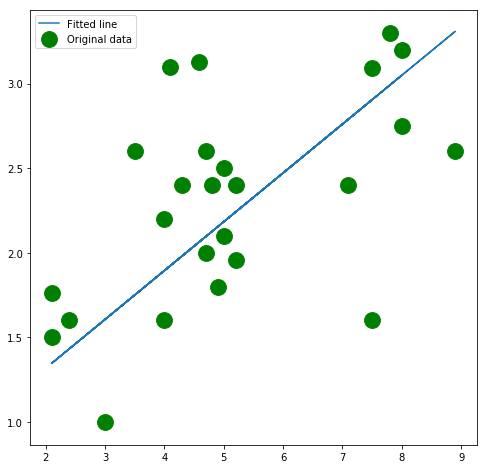

In [64]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()

Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters (with torch.no_grad() or .data to avoid tracking history in autograd).

#### The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

Use the nn package to define our model and loss function

In [65]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden, out))

loss_fn = torch.nn.MSELoss(reduction='sum')

- Use the optim package to define an Optimizer that will update the weights of the model for us
- Here we will use SGD;the optim package contains many other optimization algorithms.
- The first argument to the SGD constructor tells the optimizer which Tensors it should update.

Before the backward pass, use the optimizer object to zero all of the gradients for the variables it will update (which are the learnable weights of the model). This is because by default, gradients are accumulated in buffers( i.e, not overwritten) whenever .backward() is called.

Calling the step function on an Optimizer makes an update to its parameters

In [66]:
learning_rate = 1e-4

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(500):
    
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(i, loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

0 145.4674835205078
1 140.2801971435547
2 135.74032592773438
3 131.7306671142578
4 128.15927124023438
5 124.95307159423828
6 122.0533218383789
7 119.4123306274414
8 116.99101257324219
9 114.75703430175781
10 112.68347930908203
11 110.74774169921875
12 108.93074035644531
13 107.21620178222656
14 105.59022521972656
15 104.04081726074219
16 102.55758666992188
17 101.1314468383789
18 99.75443267822266
19 98.41949462890625
20 97.12034606933594
21 95.8513412475586
22 94.60738372802734
23 93.38382720947266
24 92.17639923095703
25 90.98111724853516
26 89.79429626464844
27 88.61244201660156
28 87.4322280883789
29 86.25049591064453
30 85.06419372558594
31 83.87035369873047
32 82.6661376953125
33 81.44872283935547
34 80.21540069580078
35 78.9635009765625
36 77.69042205810547
37 76.39366149902344
38 75.07078552246094
39 73.719482421875
40 72.3375473022461
41 70.92295837402344
42 69.47386932373047
43 67.9886474609375
44 66.4659423828125
45 64.90473175048828
46 63.3043098449707
47 61.664424896240234

#### Get the predicted values

In [67]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.1427],
        [1.5627],
        [2.8488],
        [2.7479],
        [2.0418],
        [2.9245],
        [3.2019],
        [2.2688],
        [2.1150],
        [1.4870],
        [2.9749],
        [2.2184],
        [2.8488],
        [2.2184],
        [1.9662],
        [2.9749],
        [2.2688],
        [2.1931],
        [1.7140],
        [2.1427],
        [1.9662],
        [2.1679],
        [1.8401],
        [1.4870],
        [1.9914]], grad_fn=<AddmmBackward>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [68]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.1427045],
       [1.5626926],
       [2.848806 ],
       [2.7479343],
       [2.041833 ],
       [2.9244597],
       [3.2018564],
       [2.268794 ],
       [2.1149647],
       [1.4870389],
       [2.9748955],
       [2.218358 ],
       [2.848806 ],
       [2.218358 ],
       [1.9661791],
       [2.9748955],
       [2.268794 ],
       [2.1931403],
       [1.714    ],
       [2.1427045],
       [1.9661791],
       [2.1679225],
       [1.8400896],
       [1.4870389],
       [1.9913969]], dtype=float32)

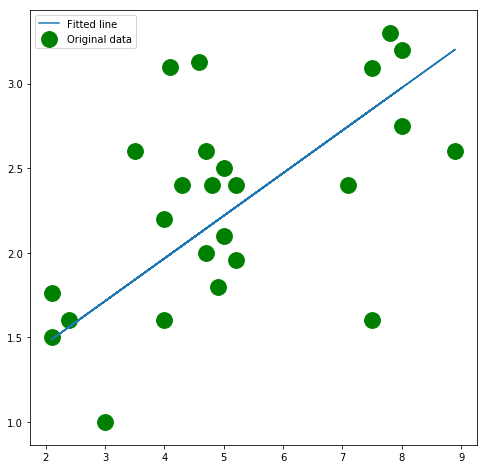

In [69]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()